(128, 128)
[0 2 3]


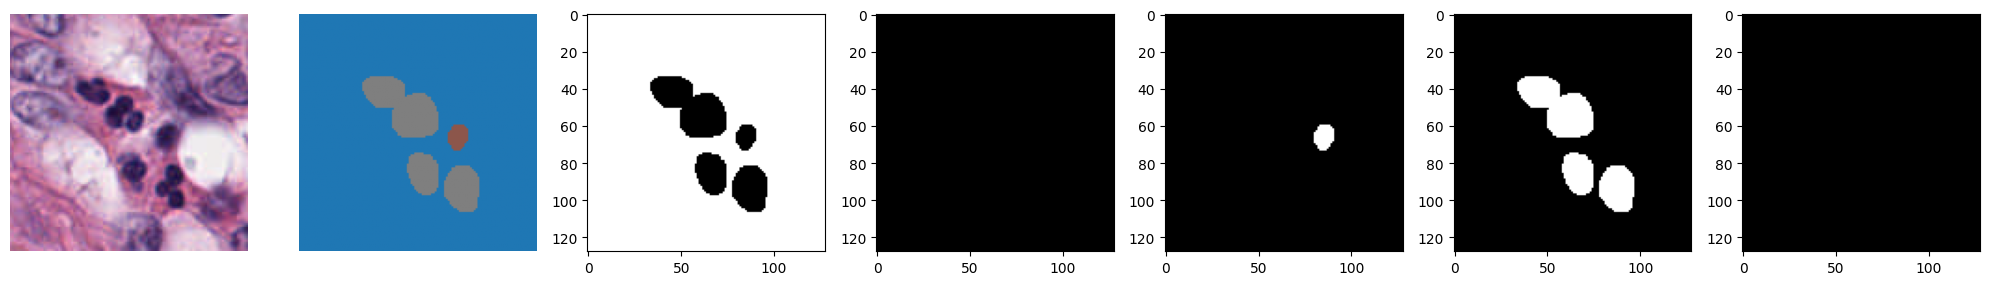

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt

from src.dataset import MoNuSACDataset
from src.constants import NAME_CLASS_MAPPING


class_idx_name_mapping = {i: c for (i, c) in enumerate(NAME_CLASS_MAPPING)}

dataset = MoNuSACDataset(root="./data/test/masks")
img, mask = dataset.__getitem__(57)
print(mask.size)
mask_array = np.array(mask)
print(np.unique(mask_array))

num_classes = len(list(NAME_CLASS_MAPPING.values())[:-1]) + 1
_, axes = plt.subplots(1, 2 + num_classes, figsize=(20, 25))

axes[0].imshow(img, cmap="grey")
axes[0].axis("off")

im = axes[1].imshow(mask, cmap="tab10", vmin=0, vmax=4)
axes[1].axis("off")

mask_tensor = torch.tensor((mask_array)).long()
one_hot = F.one_hot(mask_tensor, num_classes) 
one_hot = one_hot.permute(2, 0, 1)

for i in range(num_classes):
    axes[2 + i].imshow(one_hot[i], cmap="grey")

plt.tight_layout()
plt.show()

In [12]:
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader
from einops import rearrange

from src.dataset import MoNuSACDataset
from src.utils import CombinedTransform

additional_transform = T.Compose(
    [T.Resize((256, 256)), T.Grayscale(), T.PILToTensor()]
)
combined_transform = CombinedTransform(
    rotation_degrees=0,
    h_flip_prob=0,
    v_flip_prob=0,
    img_additional_transform=additional_transform,
    mask_additional_transform=additional_transform,
)

dataset = MoNuSACDataset(root="./data/train/masks", transform=combined_transform)
loader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=2)

mean = torch.zeros(1)
std = torch.zeros(1)
total_samples = 0

for (imgs, _) in loader:
    imgs = imgs.float() / 255.0

    imgs = rearrange(imgs, "b 1 h w -> b 1 (h w)")
    mean += imgs.mean(2).sum(0)
    std += imgs.std(2).sum(0)
    total_samples += imgs.size(0)

mean /= total_samples
std /= total_samples

print(mean, std)


tensor([0.6189]) tensor([0.1726])
